# 机器学习模型评估

## 1.1 实践任务—回归问题 

### （1）读入数据data1,查看数据前6行

In [26]:
import pandas as pd

data1 = pd.read_excel('G:/CDO/机器学习/1.实践作业/data1.xlsx')
data1.head(6)    

,CATE,bedrooms,AREA,floor,subway,school,price,style,预测房价
0,朝阳,1,46.06,middle,1,0,4.8850,无厅,4.997947
1,朝阳,1,59.09,middle,1,0,4.6540,有厅,5.133662
2,海淀,5,278.95,high,1,1,7.1662,有厅,7.314064
3,海淀,3,207.00,high,1,1,5.7972,有厅,7.291860
4,丰台,2,53.32,low,1,1,7.1268,有厅,5.746533
5,丰台,2,58.00,low,1,1,7.0690,有厅,5.733524


### （2）计算变量'price'的常用统计量，并绘制合适的图像进行展示

In [29]:
data1['price'].describe() 

count    16210.000000
mean         6.115181
std          2.229336
min          1.834800
25%          4.281225
50%          5.747300
75%          7.609975
max         14.987100
Name: price, dtype: float64

In [22]:
print(data1['price'])
print('均值',data1['price'].mean())
print('中位数',data1['price'].median())

print('方差',data1['price'].var())
print('标准差',data1['price'].std())
print('极差',data1['price'].max()-data1['price'].min())

print('偏度',data1['price'].skew())
print('峰度',data1['price'].kurt())

CATE
朝阳    4.8850
朝阳    4.6540
海淀    7.1662
海淀    5.7972
丰台    7.1268
       ...  
朝阳    5.2405
朝阳    5.2343
朝阳    5.0170
朝阳    5.2693
丰台    4.6719
Name: price, Length: 16210, dtype: float64
均值 6.115181091918592
中位数 5.7473
方差 4.969938174850668
标准差 2.22933581473287
极差 13.1523
偏度 0.6794935869486873
峰度 -0.01930588854437154


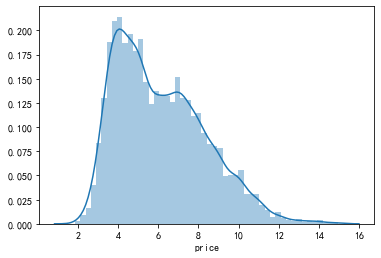

In [30]:
sns.distplot(data1['price'])

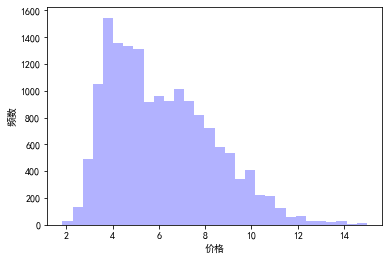

In [38]:
plt.hist(data1.price,bins=30,color='blue',alpha=0.3)#alpha设置透明度，0为完全透明    #绘制直方图
plt.xlabel('价格')   #设置x轴标签
plt.ylabel('频数')   #设置y轴标签
plt.show()      

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Bad key "text.kerning_factor" on line 4 in
E:\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


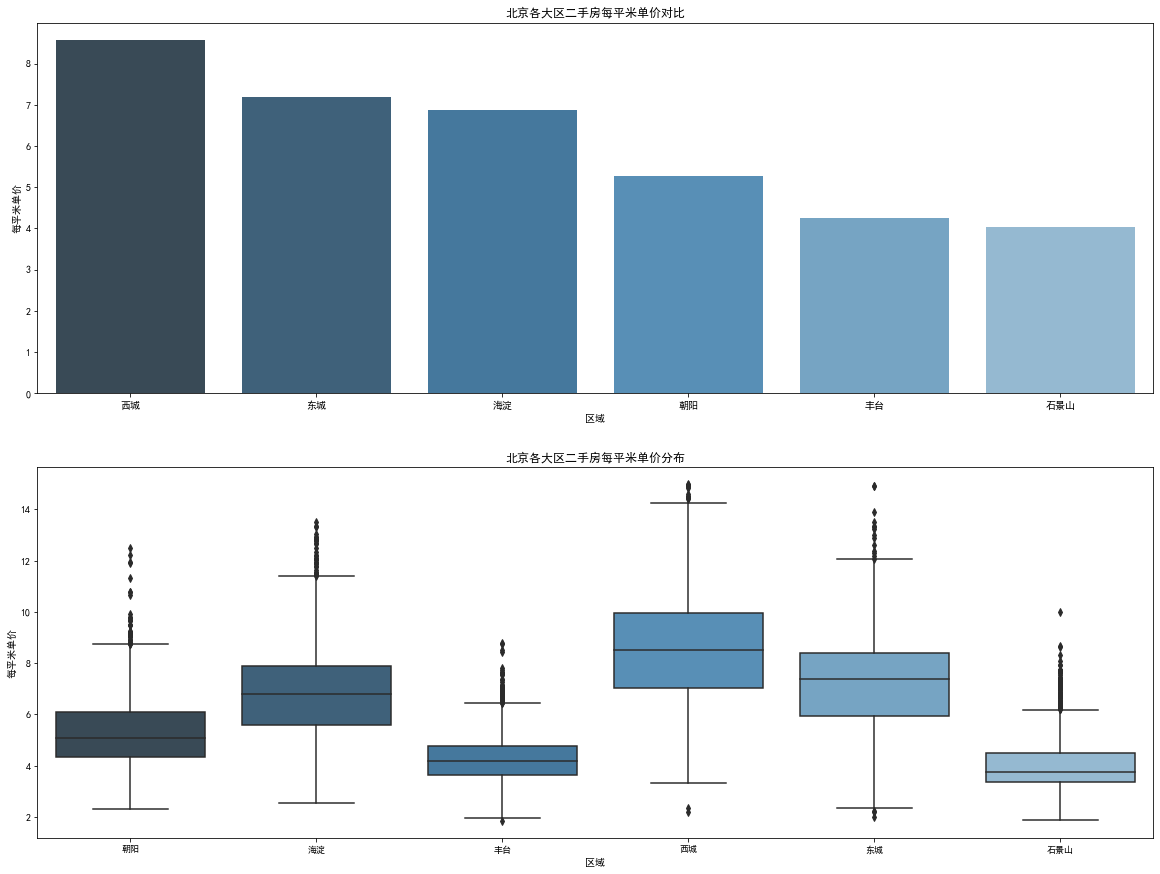

In [28]:
from pylab import mpl
mpl.rcParams['font.sans-serif']=['SimHei']
mpl.rcParams['axes.unicode_minus']=False

#各城区房每平米单价分布
data1_perprice_mean=data1.groupby("CATE")["price"].mean().sort_values(ascending=False).to_frame().reset_index()
f,[ax1,ax2]=plt.subplots(2,1,figsize=(20,15))
sns.barplot(x="CATE",y="price",palette="Blues_d",data=data1_perprice_mean,ax=ax1)
ax1.set_title("北京各大区二手房每平米单价对比")
ax1.set_xlabel('区域')
ax1.set_ylabel('每平米单价')

sns.boxplot(x="CATE",y="price",palette="Blues_d",data=data1,ax=ax2)
ax2.set_title("北京各大区二手房每平米单价分布")
ax2.set_xlabel('区域')
ax2.set_ylabel('每平米单价')
plt.xticks(fontsize=9)
plt.show()  

### （3）计算data1中变量'price'与'预测房价'的相关系数r

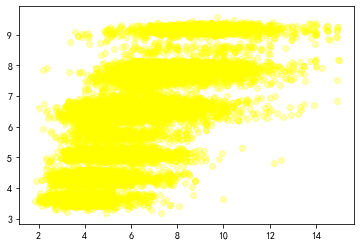

In [39]:
plt.scatter(data1['price'],data1['预测房价'],color='yellow',alpha=0.3) #绘制散点图    从下图上看有一定的正相关关系
plt.show()

In [34]:
data1[['price','预测房价']].corr(method="pearson")

,price,预测房价
price,1.000000,0.768366
预测房价,0.768366,1.000000


### （4）计算data1模型（即真实值'price'与'预测房价'）的R方、调整的R方

In [40]:
from sklearn import metrics #导入sklearn的指标库

R2 = metrics.r2_score(data1['price'],data1['预测房价']) #计算R方
R2 

0.5903869942563884

In [41]:
data1.shape

(16210, 9)

In [42]:
n=data1.shape[0]; #样本个数
k=data1.shape[1]-2;#特征数
R2_adj=1-(1-R2)*(n-1)/(n-k-1)
R2_adj     #调整的R方略小于R方

0.5902100228306257

### （5）计算data1模型的绝对误差（MAE）、均方误差（MSE）及均方根误差（RMSE）

In [43]:
metrics.mean_absolute_error(data1['price'],data1['预测房价']) #绝对误差MAE

1.0872709683413442

In [44]:
metrics.mean_squared_error(data1['price'],data1['预测房价']) #均方误差MSE

2.0356257280214467

In [45]:
metrics.mean_squared_error(data1['price'],data1['预测房价'])**0.5 #均方根误差RMSE

1.426753562470214

### （6）交叉验证：将data1分成10折，显示每次的训练集和测试集

In [46]:
from sklearn import model_selection

k_fold=model_selection.KFold(n_splits=10)
for train_data,test_data in k_fold.split(data1):
    print('train:%s|test:%s' %(train_data,test_data)) 

train:[ 1621  1622  1623 ... 16207 16208 16209]|test:[   0    1    2 ... 1618 1619 1620]
train:[    0     1     2 ... 16207 16208 16209]|test:[1621 1622 1623 ... 3239 3240 3241]
train:[    0     1     2 ... 16207 16208 16209]|test:[3242 3243 3244 ... 4860 4861 4862]
train:[    0     1     2 ... 16207 16208 16209]|test:[4863 4864 4865 ... 6481 6482 6483]
train:[    0     1     2 ... 16207 16208 16209]|test:[6484 6485 6486 ... 8102 8103 8104]
train:[    0     1     2 ... 16207 16208 16209]|test:[8105 8106 8107 ... 9723 9724 9725]
train:[    0     1     2 ... 16207 16208 16209]|test:[ 9726  9727  9728 ... 11344 11345 11346]
train:[    0     1     2 ... 16207 16208 16209]|test:[11347 11348 11349 ... 12965 12966 12967]
train:[    0     1     2 ... 16207 16208 16209]|test:[12968 12969 12970 ... 14586 14587 14588]
train:[    0     1     2 ... 14586 14587 14588]|test:[14589 14590 14591 ... 16207 16208 16209]


### （7）留出法：将data1按7:3随机分成训练集和测试集，显示训练集和测试集的前5行

In [48]:
train_data,test_data=model_selection.train_test_split(data1,test_size=0.3, random_state=42)
train_data.head()

,CATE,bedrooms,AREA,floor,subway,school,price,style,预测房价
4884,丰台,2,80.93,high,1,1,3.8676,有厅,5.471260
849,海淀,2,105.12,low,1,1,5.3273,有厅,7.662479
8814,海淀,3,208.21,low,0,0,4.5628,有厅,5.631799
7635,石景山,3,152.00,middle,1,0,3.3553,有厅,4.222481
15510,海淀,2,102.00,middle,1,0,3.8236,有厅,6.441621


In [49]:
test_data.head()

,CATE,bedrooms,AREA,floor,subway,school,price,style,预测房价
4226,东城,1,51.40,middle,1,1,6.1285,有厅,7.906079
8253,石景山,2,104.47,low,0,0,3.7332,有厅,3.617805
2450,丰台,3,133.39,middle,1,0,4.6181,有厅,4.405534
1493,丰台,2,89.48,low,1,0,4.6938,有厅,4.462898
3894,东城,3,177.00,low,1,0,7.0622,有厅,6.642439


## 2.1 实践任务—分类问题

### （1）读入数据data2,查看数据前5行

In [50]:
pd.set_option('display.float_format',lambda x : '%.5f' % x)
# python pandas 中禁用科学计数法显示
data2 = pd.read_excel('G:/CDO/机器学习/1.实践作业/data2.xlsx')
data2.head(5)    

,企业代号,企业名称,信誉评级,是否违约,企业类型,违约概率
0,E1,***电器销售有限公司,A,0,零售业,0.00000
1,E10,***建筑劳务有限公司,B,0,建筑业,0.18251
2,E100,***装饰工程有限公司,D,1,服务业,0.46757
3,E101,***灯饰工程有限公司,D,1,服务业,0.45927
4,E102,***大药房有限责任公司,D,1,医药,1.00000


### （2）计算是否违约的频数，并绘制合适的图形进行展示

In [36]:
data2.groupby(by='是否违约').size()

是否违约
0    96
1    27
dtype: int64

In [51]:
data2['是否违约'].value_counts()

0    96
1    27
Name: 是否违约, dtype: int64

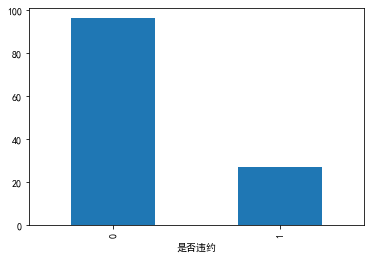

In [52]:
data2.groupby('是否违约').size().plot(kind='bar')
plt.show()

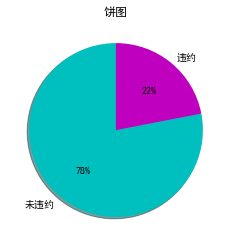

In [78]:
slices=[96,27] # 数据
activites=["未违约","违约"]
cols=["c","m"]
plt.pie(slices,
       labels=activites,
       colors=cols,
       startangle=90,  # 指定图形的起始角度
       shadow=True,
       autopct='%1.0f%%')   
plt.title('饼图')
plt.show()

### （3）以0.15为阈值，给原数据增加一列“预测是否违约”

In [53]:
data2['预测是否违约']=data2['违约概率']>0.15
data2.head()

,企业代号,企业名称,信誉评级,是否违约,企业类型,违约概率,预测是否违约
0,E1,***电器销售有限公司,A,0,零售业,0.00000,False
1,E10,***建筑劳务有限公司,B,0,建筑业,0.18251,True
2,E100,***装饰工程有限公司,D,1,服务业,0.46757,True
3,E101,***灯饰工程有限公司,D,1,服务业,0.45927,True
4,E102,***大药房有限责任公司,D,1,医药,1.00000,True


### （4）以0.15为阈值，计算混淆矩阵、准确率、查准率（精度）、查全率（召回率）、F1值及AUC

In [54]:
#from sklearn import metrics #前面已加载
#混淆矩阵
metrics.confusion_matrix(data2['是否违约'],data2['预测是否违约'],labels=[1,0])  

array([[25,  2],
       [33, 63]], dtype=int64)

In [55]:
#准确率  accuracy=(TP+TN)/(P+N) 预测正确的样本数目/参加预测的样本总数目
metrics.accuracy_score(data2['是否违约'],data2['预测是否违约']) 

0.7154471544715447

In [56]:
#查准率（精度） precision=TP/(TP+FP) 所有预测为正例的样本中真正为正例的样本的比率
metrics.precision_score(data2['是否违约'],data2['预测是否违约'],average='binary') 

0.43103448275862066

In [57]:
#查全率（召回率）recall=TP/(TP+FN)
metrics.recall_score(data2['是否违约'],data2['预测是否违约'],average='binary')

0.9259259259259259

In [58]:
#F1值，F1=2PR/(P+R)
metrics.f1_score(data2['是否违约'],data2['预测是否违约'],average='binary')

0.5882352941176471

In [59]:
#AUC
metrics.roc_auc_score(data2['是否违约'],data2['预测是否违约']) 

0.791087962962963

In [60]:
#一次性输出
print(metrics.classification_report(data2.是否违约 ,data2.预测是否违约,labels=[1,0],target_names=['1','0']))

              precision    recall  f1-score   support

           1       0.43      0.93      0.59        27
           0       0.97      0.66      0.78        96

    accuracy                           0.72       123
   macro avg       0.70      0.79      0.69       123
weighted avg       0.85      0.72      0.74       123



### （5）以0.3为阈值，计算准确率、查准率（精度）、查全率（召回率）

In [61]:
data2['预测是否违约1']=data2['违约概率']>0.3
data2.head()

,企业代号,企业名称,信誉评级,是否违约,企业类型,违约概率,预测是否违约,预测是否违约1
0,E1,***电器销售有限公司,A,0,零售业,0.00000,False,False
1,E10,***建筑劳务有限公司,B,0,建筑业,0.18251,True,False
2,E100,***装饰工程有限公司,D,1,服务业,0.46757,True,True
3,E101,***灯饰工程有限公司,D,1,服务业,0.45927,True,True
4,E102,***大药房有限责任公司,D,1,医药,1.00000,True,True


In [63]:
#与阈值是0.15的比较，在阈值为0.3时，精率提高，召回率降低
print(metrics.classification_report(data2.是否违约 ,data2.预测是否违约1,labels=[1,0],target_names=['1','0'])) 

              precision    recall  f1-score   support

           1       0.50      0.67      0.57        27
           0       0.90      0.81      0.85        96

    accuracy                           0.78       123
   macro avg       0.70      0.74      0.71       123
weighted avg       0.81      0.78      0.79       123



### （7）绘制P-R曲线

In [64]:
precision, recall, thresholds = metrics.precision_recall_curve(data2['是否违约'],data2['违约概率'],pos_label=1)

In [65]:
for i in range(len(thresholds)):
    print("precision:%0.3f|recall:%0.3f|thresholds:%0.3f" %(precision[i], recall[i], thresholds[i]))

precision:0.397|recall:1.000|thresholds:0.097
precision:0.388|recall:0.963|thresholds:0.105
precision:0.379|recall:0.926|thresholds:0.108
precision:0.385|recall:0.926|thresholds:0.109
precision:0.391|recall:0.926|thresholds:0.117
precision:0.397|recall:0.926|thresholds:0.121
precision:0.403|recall:0.926|thresholds:0.124
precision:0.410|recall:0.926|thresholds:0.131
precision:0.417|recall:0.926|thresholds:0.132
precision:0.424|recall:0.926|thresholds:0.149
precision:0.431|recall:0.926|thresholds:0.160
precision:0.421|recall:0.889|thresholds:0.181
precision:0.429|recall:0.889|thresholds:0.183
precision:0.436|recall:0.889|thresholds:0.193
precision:0.426|recall:0.852|thresholds:0.193
precision:0.434|recall:0.852|thresholds:0.205
precision:0.442|recall:0.852|thresholds:0.211
precision:0.431|recall:0.815|thresholds:0.216
precision:0.440|recall:0.815|thresholds:0.217
precision:0.429|recall:0.778|thresholds:0.229
precision:0.438|recall:0.778|thresholds:0.232
precision:0.447|recall:0.778|thres

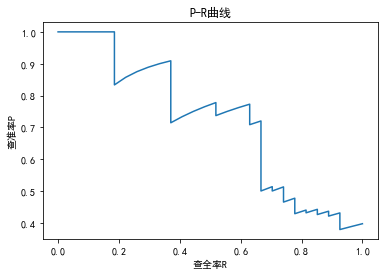

In [67]:
plt.plot(recall,precision)
plt.xlabel("查全率R") 
plt.ylabel("查准率P")
plt.title("P-R曲线") 
plt.show()

### （8）绘制ROC曲线

In [68]:
fpr, tpr, thresholds = metrics.roc_curve(data2['是否违约'],data2['违约概率'],pos_label=1)

In [69]:
for i in range(len(thresholds)):
    print("FPR:%0.3f|TPR:%0.3f|thresholds:%0.3f" %(fpr[i], tpr[i], thresholds[i]))

FPR:0.000|TPR:0.000|thresholds:2.000
FPR:0.000|TPR:0.037|thresholds:1.000
FPR:0.000|TPR:0.185|thresholds:0.825
FPR:0.010|TPR:0.185|thresholds:0.818
FPR:0.010|TPR:0.370|thresholds:0.620
FPR:0.042|TPR:0.370|thresholds:0.522
FPR:0.042|TPR:0.519|thresholds:0.482
FPR:0.052|TPR:0.519|thresholds:0.468
FPR:0.052|TPR:0.630|thresholds:0.454
FPR:0.073|TPR:0.630|thresholds:0.430
FPR:0.073|TPR:0.667|thresholds:0.417
FPR:0.188|TPR:0.667|thresholds:0.304
FPR:0.188|TPR:0.704|thresholds:0.298
FPR:0.198|TPR:0.704|thresholds:0.295
FPR:0.198|TPR:0.741|thresholds:0.292
FPR:0.240|TPR:0.741|thresholds:0.273
FPR:0.240|TPR:0.778|thresholds:0.273
FPR:0.292|TPR:0.778|thresholds:0.229
FPR:0.292|TPR:0.815|thresholds:0.217
FPR:0.302|TPR:0.815|thresholds:0.216
FPR:0.302|TPR:0.852|thresholds:0.211
FPR:0.323|TPR:0.852|thresholds:0.193
FPR:0.323|TPR:0.889|thresholds:0.193
FPR:0.344|TPR:0.889|thresholds:0.181
FPR:0.344|TPR:0.926|thresholds:0.160
FPR:0.427|TPR:0.926|thresholds:0.108
FPR:0.427|TPR:1.000|thresholds:0.097
F

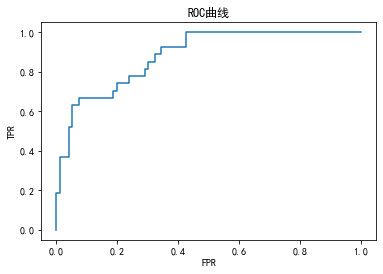

In [70]:
plt.plot(fpr, tpr) #绘制ROC曲线图
plt.xlabel("FPR") 
plt.ylabel("TPR")
plt.title("ROC曲线")
plt.show()